<a href="https://colab.research.google.com/github/LeeJiwoo982/DL_study/blob/main/DL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

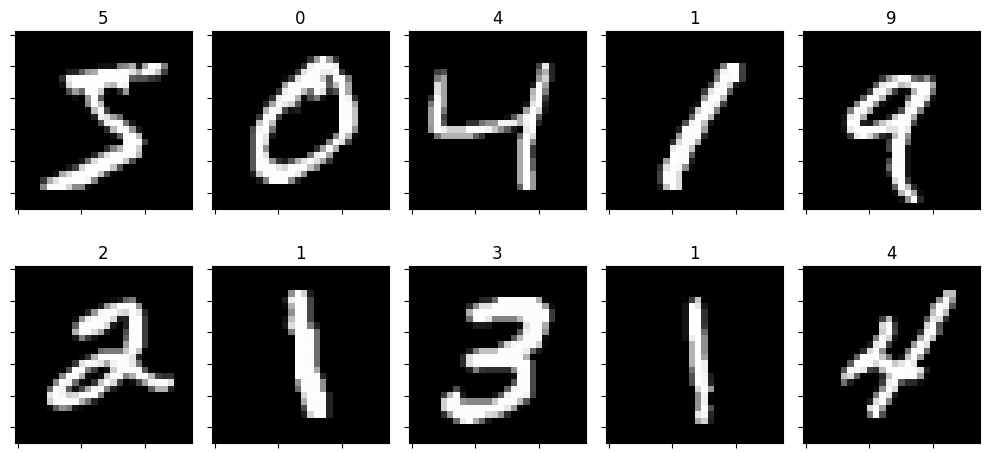

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,5)
fig.set_size_inches(10,5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]))
    plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0
#이미지 정규화과정. 전처리.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam', metrics=['acc'])

In [11]:
model.fit(x_train,y_train
          ,validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 5ms/step - loss: 0.3118 - acc: 0.9128 - val_loss: 0.1819 - val_acc: 0.9457
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1539 - acc: 0.9550 - val_loss: 0.1319 - val_acc: 0.9608
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1132 - acc: 0.9659 - val_loss: 0.1073 - val_acc: 0.9689
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0887 - acc: 0.9736 - val_loss: 0.0973 - val_acc: 0.9694
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - acc: 0.9775 - val_loss: 0.0937 - val_acc: 0.9722


In [ ]:
test_loss, test_acc =model.evaluation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5),strides=(1,1),
             padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64, kernel_size=(2,2),activation='relu',padding='same',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1176 - acc: 0.9636 - val_loss: 0.0391 - val_acc: 0.9869
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0449 - acc: 0.9856 - val_loss: 0.0315 - val_acc: 0.9896
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0333 - acc: 0.9892 - val_loss: 0.0338 - val_acc: 0.9889
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0250 - acc: 0.9919 - val_loss: 0.0294 - val_acc: 0.9914
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0254 - val_acc: 0.9926


In [19]:
score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0254 - acc: 0.9926
Test Loss : 0.02542458288371563
Test Accuracy  : 0.9926000237464905


###선생님버전

In [ ]:
#reshape해야하는 이유. DNN과 CNN의 차이
# x_train=x_train.reshape(60000, 28, 28, 1) # 1은 흑백이라/ 컬러면 3
# x_test = x_test.reshape(10000, 28,28,1)

model.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

#Fashion MNIST

In [21]:
import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [25]:
train_images=train_images.reshape(60000, 28, 28, 1) # 1은 흑백이라/ 컬러면 3
test_images = test_images.reshape(10000, 28,28,1)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(64))

In [ ]:
#회귀분석,리니어,로지스틱스, 로스펑션, 활성화함수구분/기본신경망모델아이리스/mnist/
#구글텐서플로우 자격시험
